In [4]:
import pickle as pkl
import os
import numpy as np 
import matplotlib.pyplot as plt
import torch

from scipy.io import loadmat

In [5]:
data = loadmat('/home/student/Desktop/Groundeep/circle_dataset_100x100/NumStim_1to32_100x100_TR.mat')
np.savez('/home/student/Desktop/Groundeep/circle_dataset_100x100/NumStim_1to32_100x100_TR.npz', **data)


In [6]:
data = np.load('/home/student/Desktop/Groundeep/circle_dataset_100x100/NumStim_1to32_100x100_TR.npz', allow_pickle=True)

data_np_train = data['D']


# Esegui l'operazione binaria sull'array NumPy
binary_data_np_train = np.where(data_np_train >= 0.5, 1, 0).astype(np.uint8)
np.savez_compressed('/home/student/Desktop/Groundeep/circle_dataset_100x100/binary_de_wind_training_dbn.npz', D=binary_data_np_train.T, N_list=data['N_list'].squeeze(), cumArea_list=data['cumArea_list'].squeeze(),
                    FA_list=data['FA_list'].squeeze(), CH_list=data['CH_list'].squeeze())




Dati iniziali caricati con successo dai file .pkl.
Etichetta immagine 1: tensor([1., 0.])


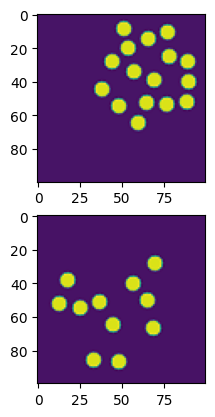

Etichetta immagine 2: tensor([1., 0.])


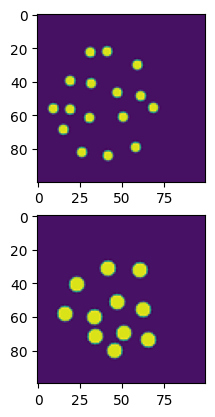

Etichetta immagine 3: tensor([1., 0.])


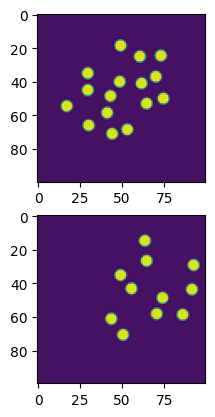

Etichetta immagine 4: tensor([1., 0.])


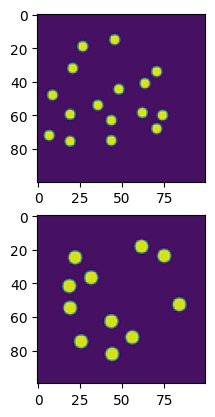

Etichetta immagine 5: tensor([1., 0.])


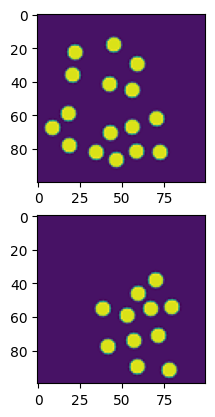

Etichetta immagine 6: tensor([1., 0.])


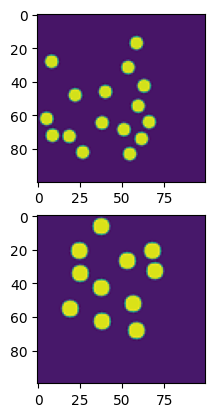

Etichetta immagine 7: tensor([1., 0.])


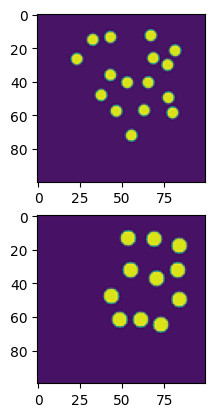

Etichetta immagine 8: tensor([1., 0.])


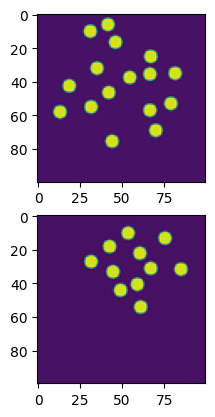

Etichetta immagine 9: tensor([1., 0.])


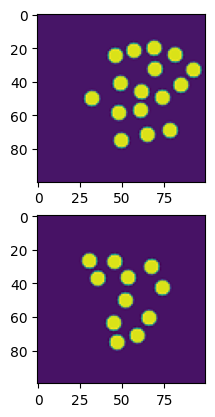

Etichetta immagine 10: tensor([1., 0.])


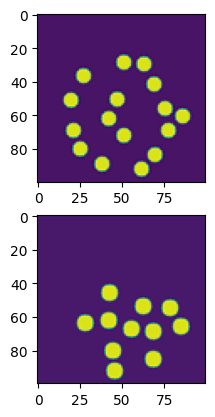

Dati binari generati e nuova struttura del dizionario creata.
Assicurata l'esistenza della directory: /home/student/Desktop/Groundeep/circle_dataset_100x100/
Nuovi dati di train (con labels e idxs) salvati in: /home/student/Desktop/Groundeep/circle_dataset_100x100/binary_de_wind_train.pkl
Nuovi dati di test (con labels e idxs) salvati in: /home/student/Desktop/Groundeep/circle_dataset_100x100/binary_de_wind_test.pkl


In [12]:
import pickle as pkl
import numpy as np
import os
import torch # Necessario perché 'data_train' e 'data_test' contengono tensori PyTorch

# Caricamento dei dati dai file .pkl esistenti
# Abbiamo visto che questi contengono tensori PyTorch, quindi pkl.load funziona
# ma l'output 'data' è un tensore PyTorch
with open('/home/student/Desktop/Groundeep/casual_data/pairs_from_mat_train.pkl', 'rb') as f:
    data_train = pkl.load(f)

with open('/home/student/Desktop/Groundeep/casual_data/pairs_from_mat_test.pkl', 'rb') as f:
    data_test = pkl.load(f)

print("Dati iniziali caricati con successo dai file .pkl.")
# Esempio di come appare data_train:
# {'data': tensor([...]), 'labels': tensor([...]), 'idxs': tensor([...])}


# --- Modifica qui per convertire solo i dati in binario e mantenere la struttura ---

# Converti i tensori 'data' in NumPy array per l'operazione np.where
# Assicurati di usare .cpu().numpy() se stai lavorando con GPU
data_np_train = data_train['data'].cpu().numpy()
data_np_test = data_test['data'].cpu().numpy()

# Esegui l'operazione binaria sull'array NumPy
binary_data_np_train = np.where(data_np_train >= 0.5, 255, 0).astype(np.uint8)
binary_data_np_test = np.where(data_np_test >= 0.5, 255, 0).astype(np.uint8)

for i in range(10):
    # Crea una figura con due subplot per ogni immagine
    fig, axs = plt.subplots(2, 1)

    # Visualizza la prima metà dell'immagine
    axs[0].imshow(data_train['data'][100][i][0:10000].reshape(100,100))

    # Visualizza la seconda metà dell'immagine
    axs[1].imshow(data_train['data'][100][i][10000:20000].reshape(100,100))

    # Stampa l'etichetta dell'immagine
    print(f"Etichetta immagine {i+1}: {data_train['labels'][100][i]}")

    # Mostra la figura con i due subplot
    plt.show()
# Crea nuovi dizionari che contengono i dati binari e le chiavi originali
# Converti i tensori originali 'labels' e 'idxs' in NumPy array
# per coerenza nel nuovo file .pkl, se desideri che tutto sia NumPy
# o lasciali come tensori se prevedi di ricaricarli con PyTorch in seguito.
# Per semplicità e coispicuità con numpy.where, li converto a numpy.
new_data_train = {
    'data': binary_data_np_train,
    'labels': data_train['labels'].cpu().numpy(),
    'idxs': data_train['idxs'].cpu().numpy()
}

new_data_test = {
    'data': binary_data_np_test,
    'labels': data_test['labels'].cpu().numpy(),
    'idxs': data_test['idxs'].cpu().numpy()
}

print("Dati binari generati e nuova struttura del dizionario creata.")


# --- Sezione per il salvataggio dei file .pkl ---

# Definisci la directory di output
output_dir = '/home/student/Desktop/Groundeep/circle_dataset_100x100/'

# Crea la directory di output se non esiste
try:
    os.makedirs(output_dir, exist_ok=True)
    print(f"Assicurata l'esistenza della directory: {output_dir}")
except OSError as e:
    print(f"Errore nella creazione della directory {output_dir}: {e}")
    print("Controlla i permessi o il percorso.")
    exit()

# Definisci i percorsi completi per i nuovi file .pkl
output_path_train_pkl = os.path.join(output_dir, 'binary_de_wind_train.pkl')
output_path_test_pkl = os.path.join(output_dir, 'binary_de_wind_test.pkl')

# Salvataggio dei nuovi dizionari come file .pkl
try:
    with open(output_path_train_pkl, 'wb') as f:
        pkl.dump(new_data_train, f) # Salva il nuovo dizionario
    print(f"Nuovi dati di train (con labels e idxs) salvati in: {output_path_train_pkl}")
except Exception as e:
    print(f"Errore durante il salvataggio del file di train: {e}")
    print("Verifica i permessi di scrittura e lo spazio su disco.")

try:
    with open(output_path_test_pkl, 'wb') as f:
        pkl.dump(new_data_test, f) # Salva il nuovo dizionario
    print(f"Nuovi dati di test (con labels e idxs) salvati in: {output_path_test_pkl}")
except Exception as e:
    print(f"Errore durante il salvataggio del file di test: {e}")
    print("Verifica i permessi di scrittura e lo spazio su disco.")

# --- Le righe originali per salvare come .npz (se vuoi mantenerle, altrimenti rimuovile) ---
# np.savez(os.path.join(output_dir, 'binary_de_wind_train.npz'), data=binary_data_np_train)
# np.savez(os.path.join(output_dir, 'binary_de_wind_test.npz'), data=binary_data_np_test)

In [5]:
data = np.load('/home/student/Desktop/Groundeep/circle_dataset_100x100/binary_de_wind.npz')

data = data['binary_data']

data.shape

(659, 100, 10000)

In [4]:
import pickle as pkl
import numpy as np
import os
import torch # Necessario perché 'data_train' e 'data_test' contengono tensori PyTorch

# Caricamento dei dati dai file .pkl esistenti
# Abbiamo visto che questi contengono tensori PyTorch, quindi pkl.load funziona
# ma l'output 'data' è un tensore PyTorch
data = np.load("/home/student/Desktop/Groundeep/circle_dataset_100x100/circle_dataset_100x100_v2.npz")
# --- Modifica qui per convertire solo i dati in binario e mantenere la struttura ---

# Converti i tensori 'data' in NumPy array per l'operazione np.where
# Assicurati di usare .cpu().numpy() se stai lavorando con GPU

# Esegui l'operazione binaria sull'array NumPy
binary_data = np.where(data['D'] >= 0.5, 255, 0).astype(np.uint8)

# Crea nuovi dizionari che contengono i dati binari e le chiavi originali
# Converti i tensori originali 'labels' e 'idxs' in NumPy array
# per coerenza nel nuovo file .pkl, se desideri che tutto sia NumPy
# o lasciali come tensori se prevedi di ricaricarli con PyTorch in seguito.
# Per semplicità e coispicuità con numpy.where, li converto a numpy.
new_data_train = {
    'D': binary_data,
    'N_list': data['N_list'],
    'cumArea_list': data['cumArea_list'],
    'FA_list': data['FA_list'],
    'CH_list': data['CH_list'],
    'item_size': data['item_size']
}

print("Dati binari generati e nuova struttura del dizionario creata.")


# --- Sezione per il salvataggio dei file .pkl ---

# Definisci la directory di output
output_dir = '/home/student/Desktop/Groundeep/circle_dataset_100x100/'

# Crea la directory di output se non esiste
try:
    os.makedirs(output_dir, exist_ok=True)
    print(f"Assicurata l'esistenza della directory: {output_dir}")
except OSError as e:
    print(f"Errore nella creazione della directory {output_dir}: {e}")
    print("Controlla i permessi o il percorso.")
    exit()

# Definisci i percorsi completi per i nuovi file .pkl
output_path = os.path.join(output_dir, 'binarized_data.npz')

# Salvataggio dei nuovi dizionari come file .pkl
try:
    np.savez(output_path,**new_data_train)# Salva il nuovo dizionario
    print(f"Nuovi dati di train (con labels e idxs) salvati in: {output_path_train_pkl}")
except Exception as e:
    print(f"Errore durante il salvataggio del file di train: {e}")
    print("Verifica i permessi di scrittura e lo spazio su disco.")


# --- Le righe originali per salvare come .npz (se vuoi mantenerle, altrimenti rimuovile) ---
# np.savez(os.path.join(output_dir, 'binary_de_wind_train.npz'), data=binary_data_np_train)
# np.savez(os.path.join(output_dir, 'binary_de_wind_test.npz'), data=binary_data_np_test)

Dati binari generati e nuova struttura del dizionario creata.
Assicurata l'esistenza della directory: /home/student/Desktop/Groundeep/circle_dataset_100x100/
Errore durante il salvataggio del file di train: name 'output_path_train_pkl' is not defined
Verifica i permessi di scrittura e lo spazio su disco.
